In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random
from scipy import stats
from collections import OrderedDict 

In [2]:
def iteratelistsum(data):
    soma = 0
    N = len(data)
    for k in range(N):
        soma += data[k]
        
    return None

def sumlist(data):
    sum(data)
    
    return None

def npsum(data):
    np.sum(data)
    
    return None

def iteratearraysum(data):
    soma = 0
    N = len(data)
    for k in range(N):
        soma += data[k]
        
    return None

def time2(n,func,datatype):
    x = np.zeros(n)
    y = np.zeros(n)
    factor = 1e6 ## Converts units of seconds to units of microseconds
    
    for k in range(n):
        N = (2**8) * (k + 1)
        
        if datatype == 0:
            data = random.sample(range(2*N), N)
            
        elif datatype == 1:
            data = np.random.randint(0, 2*N, N)
            
        else:
            return 'Invalid datatype. Use 0 for lists and 1 for numpy arrays.'
            
        time_it = %timeit -q -n 16 -o func(data)
        x[k] = N
        y[k] = time_it.best * factor
    
    print('Computed', k+1, 'loops', end='')
            
    return x, y

def plot(x,y,title):
    slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
    r_squared = r_value**2
    
    plt.title(title)
    plt.xlabel('N')
    plt.ylabel('Time ($\mu$s)')
    plot = plt.plot(x, y, 'o:', label='data')    
    plt.plot(x, x*slope + intercept, label='lin regress')
    
    plt.legend(loc='best')
    
    return plt.show(plot), print('r^2:', r_squared, '\nslope:', slope, '\n')

Computed 16 loops

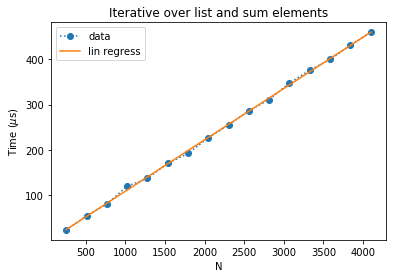

r^2: 0.9993651159331173 
slope: 0.11351627125459818 

Computed 16 loops

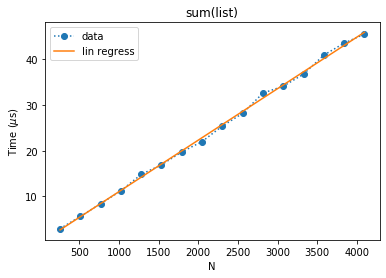

r^2: 0.9985371660557274 
slope: 0.011275670668655294 

Computed 16 loops

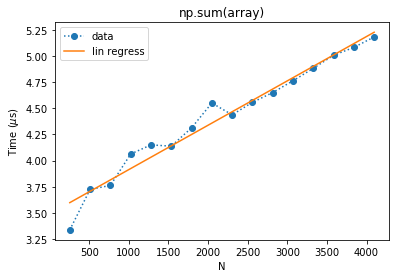

r^2: 0.9634465153884922 
slope: 0.00042397891773994164 

Computed 16 loops

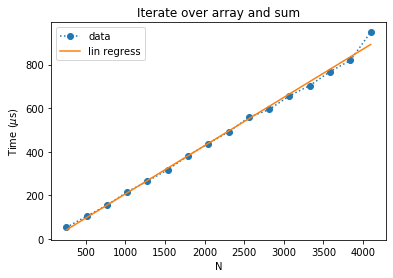

r^2: 0.9959607362778937 
slope: 0.22167638442095547 



In [3]:
n = 16

title_func = OrderedDict([
    ('Iterative over list and sum elements' , iteratelistsum),
    ('sum(list)' , sumlist),
    ('np.sum(array)' , npsum),
    ('Iterate over array and sum' , iteratearraysum)
])

i = 0
for title, func in title_func.items():
    if i < 2:
        datatype = 0
    else:
        datatype = 1
    plot(*time2(n,func,datatype),title)
    i += 1